In [1]:
import numpy as np
import matplotlib.pyplot as plt
from black_scholes import Black_scholes

# Part I: Option Valuation

## A)

In [32]:
class Monte_carlo():
    def __init__(self, S,r,vol, T, K ,n_samples):
        """
        Black_scholes model class.
        Inputs:
            -   S: stock price
            -   r: risk-free interest rate
            -   vol: volatility fo the stock % in decimals
            -   T: Time period
            -   K: Strike price
            -   n_samples: For big MC simulations
        """

        self.S = S
        self.r = r
        self.vol = vol
        self.T = T
        self.K = K
        self.n_samples = n_samples


    def mc_euler_european(self, seed = None):
        """
        Does MonteCarlo method for H with euler method
        Inputs:
            - n_samples: Number of samples to draw
            - Seed: Seed to use
        """
        np.random.seed(seed)
        n_samples = self.n_samples
        Z = np.random.normal(0,1,size = n_samples)
    
        mc_ST = self.S*np.exp((self.r - 0.5*self.vol**2)*self.T + self.vol*np.sqrt(self.T)*Z)
        mc_Hi = np.maximum(self.K -mc_ST,0)

       
        self.mc_Hi = np.exp(-self.r*self.T) * mc_Hi
        self.mc_std = np.std(self.mc_Hi) / np.sqrt(self.n_samples)
        self.mc_H = np.average(self.mc_Hi)
        self.mc_rmse = np.std(self.mc_Hi)/ np.sqrt(self.n_samples)
    
        

### Straight convergence

0.049212300317044155


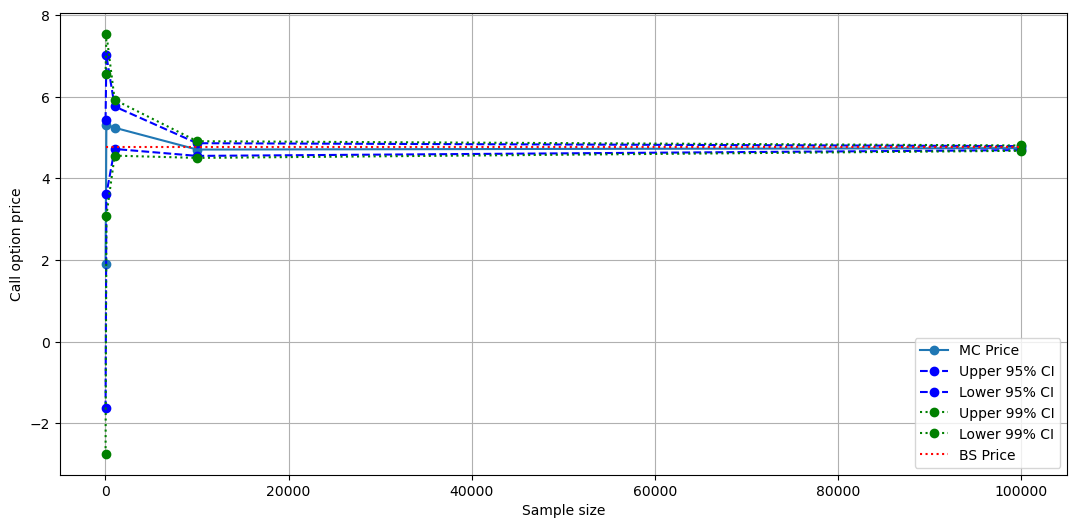

In [91]:
vol = 0.2
N = 100
S = 100
T = 1.
r = 0.06
K = 99
n_samples_list = [10, 100, 1000, 10000, 100000]
mc_prices = []
upper_95 = []
lower_95 = []
upper_99 = []
lower_99 = []
std_values = []
z_95 = 1.96
z_99 = 2.576


for n_samples in n_samples_list:
    black_scholes = Monte_carlo(S, r, vol, T, K,n_samples)\
    
    black_scholes.mc_euler_european()
    std_values += [black_scholes.mc_std]
    mc_prices += [black_scholes.mc_H]

    upper_95 += [black_scholes.mc_H + z_95*black_scholes.mc_rmse]
    lower_95 += [black_scholes.mc_H - z_95*black_scholes.mc_rmse]
    
    upper_99 += [black_scholes.mc_H + z_99*black_scholes.mc_rmse]
    lower_99 += [black_scholes.mc_H - z_99*black_scholes.mc_rmse]
    
bs = Black_scholes(S,r,vol,T,N,K)
black_scholes = Monte_carlo(S, r, vol, T, K,n_samples_list[-1])
black_scholes.mc_euler_european()
fig,axs = plt.subplots(1,1,figsize = (13,6))
print(z_95*black_scholes.mc_rmse)
axs.plot(n_samples_list, mc_prices,marker='o', label=f"MC Price") 
axs.plot(n_samples_list, upper_95, marker='o',label=f"Upper 95% CI", linestyle= "dashed", color= "blue")
axs.plot(n_samples_list,lower_95, marker='o',label=f"Lower 95% CI", linestyle= "dashed", color= "blue")
axs.plot(n_samples_list,upper_99, marker='o',label=f"Upper 99% CI", linestyle= "dotted", color= "green")
axs.plot(n_samples_list,lower_99, marker='o',label=f"Lower 99% CI", linestyle= "dotted", color= "green")
axs.plot(n_samples_list,np.full(len(n_samples_list), bs.eu_Vt[0]), label=f"BS Price", linestyle= "dotted", color= "red")
plt.grid(True) 


axs.set_xlabel("Sample size")
axs.set_ylabel("Call option price")
axs.legend()


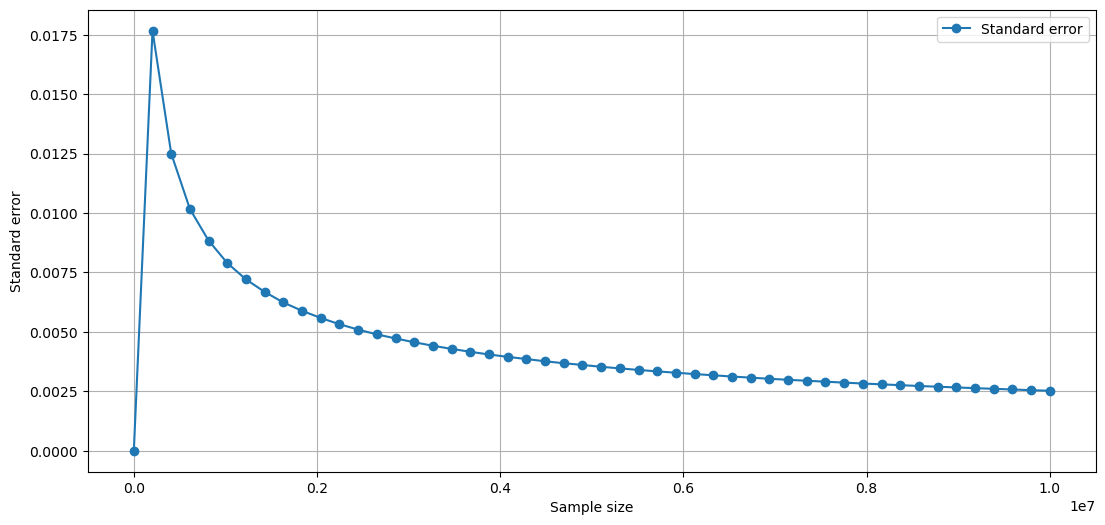

In [483]:
vol = 0.2
N = 100
S = 100
T = 1.
r = 0.06
K = 99


mc_prices = []
upper_95 = []
lower_95 = []
upper_99 = []
lower_99 = []
std_values = []
z_95 = 1.96
z_99 = 2.576
n_samples_list = np.linspace(1,10**7, num = 50, dtype =int)

for n_samples in n_samples_list:
    black_scholes = Monte_carlo(S, r, vol, T, K,n_samples)\
    
    black_scholes.mc_euler_european()
    std_values += [black_scholes.mc_std]
    mc_prices += [black_scholes.mc_H]

    upper_95 += [black_scholes.mc_H + z_95*black_scholes.mc_rmse/np.sqrt(n_samples)]
    lower_95 += [black_scholes.mc_H - z_95*black_scholes.mc_rmse/np.sqrt(n_samples)]
    
    upper_99 += [black_scholes.mc_H + z_99*black_scholes.mc_rmse/np.sqrt(n_samples)]
    lower_99 += [black_scholes.mc_H - z_99*black_scholes.mc_rmse/np.sqrt(n_samples)]
fig,axs = plt.subplots(1,1,figsize = (13,6))
axs.plot(n_samples_list,std_values, marker = 'o', label=f"Standard error")
plt.grid(True) 
axs.set_xlabel("Sample size")
axs.set_ylabel("Standard error")
axs.legend()
plt.show()

In [487]:
std_values = np.array([std_values])

### Volatility and Strike price

In [492]:
## Varying volatility
num = 500
n_samples = 80_000
vol = 0.2
S = 100
T = 1.
r = 0.06
K = 99
vols = np.linspace(0,1,num = num)
Ks = np.linspace(80,600, num = num)
std = []

bs_vols = np.vectorize(Monte_carlo, excluded=['S','r','T','K','n_samples'])(S,r,vols,T,K,n_samples)
bs_strike = np.vectorize(Monte_carlo, excluded=['S','r''vol','T','n_samples'])(S,r,vol,T,Ks,n_samples)
black_scholes = np.array([bs_vols,bs_strike])
np.vectorize(lambda x: x.mc_euler_european())(black_scholes)
std = np.vectorize(lambda x: x.mc_std)(black_scholes)
values = np.vectorize(lambda x: x.mc_H)(black_scholes)


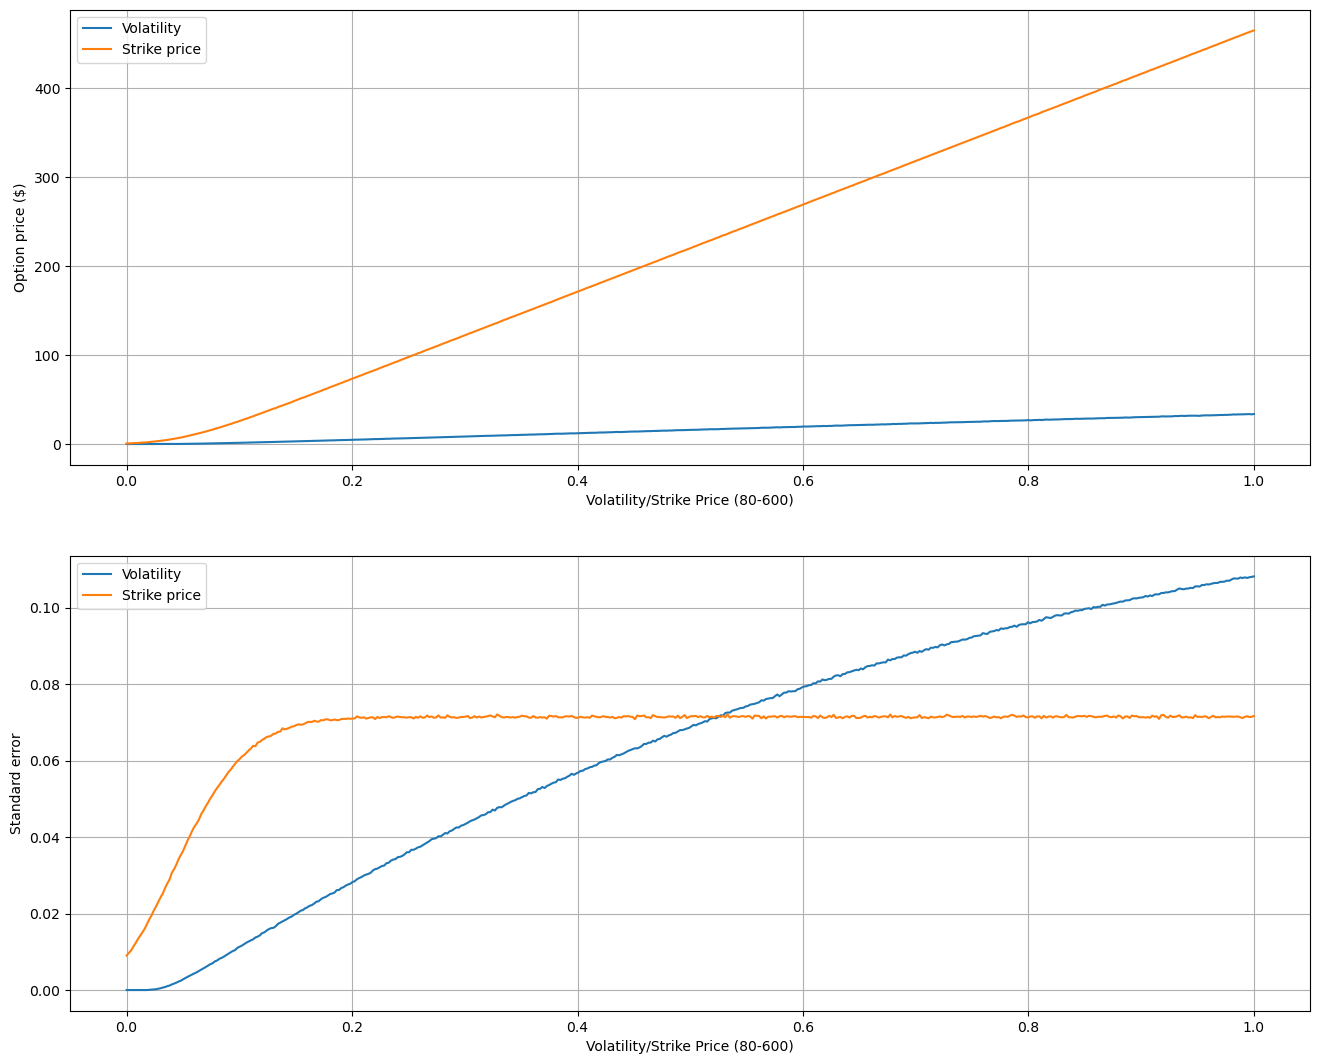

In [493]:
fig,axs = plt.subplots(2,1,figsize = (16,13))
axs = axs.flatten()

axs[0].plot(vols,values[0], label = "Volatility")

axs[0].plot(vols,values[1],label = "Strike price")


axs[0].set_xlabel("Volatility/Strike Price (80-600)")
axs[0].set_ylabel("Option price ($)")
axs[0].legend()
axs[0].grid(True)
axs[1].plot(vols,std[0],label = "Volatility" )

axs[1].plot(vols,std[1], label = "Strike price")
axs[1].grid(True) 
axs[1].legend()
axs[1].set_xlabel("Volatility/Strike Price (80-600)")
axs[1].set_ylabel("Standard error")


plt.show()

## B)

In [491]:
class Milstein():
    def __init__(self,S,r,T,K,iota,k,sigma,p,B = float('inf'), n_samples = 10_000, n_steps = 252):
        """
        Black_scholes model class.
        Inputs:
            -   S: stock price
            -   r: risk-free interest rate
            -   T: Time period
            -   K: Strike price
            -    Iota: long-term variance
            -    k: Reversion rate
            -    sigma: vol of vol
            -    p: correlation
            -    B: Barrier, default set to infinity
        """
        self.S = S
        self.r = r
        self.T = T  
        self.K = K 

        self.iota = iota
        self.k = k
        self.sigma = sigma
        self.p = p
        self.B = B
        self.n_steps = n_steps
        self.dt = 1/n_steps
        self.n_samples = n_samples

    def milstein_scheme_ar(self,seed = None):
        """
        Does milstein scheme for Heston model using full truncation:
        Inputs:
            -    mode: If using arithmetic or geometric
            -    Seed: Seed to use
        """
        mi_St = np.zeros((self.n_samples,self.n_steps))
        mi_St[:,0] = self.S
        mi_Vt = 0.2

        ###Pre-computations
        Z_1 = np.random.normal(0,1,size = (self.n_samples,self.n_steps-1))
        Zv = Z_1
        Z_2 = np.random.normal(0,1,size = (self.n_samples,self.n_steps-1))
        Zs = self.p*Z_1 + np.sqrt(1-self.p**2)*Z_2
        ### Stock simulation

        for m in range(1,self.n_steps):
            mi_St[:, m] = mi_St[:, m-1] + self.r*mi_St[:, m-1] *self.dt + np.sqrt(mi_Vt*self.dt)*mi_St[:, m-1] *Zs[:, m-1]  + 1/2 * mi_Vt*mi_St[:, m-1] *self.dt*(Zs[:, m-1] **2 - 1)
            mi_Vt = np.maximum(mi_Vt + self.k*(self.iota - mi_Vt)*self.dt + self.sigma*np.sqrt(mi_Vt*self.dt)*Zv[:, m-1]  + (1/4)*(self.sigma**2)*self.dt*(Zv[:, m-1] -1),0)

        self.mi_Hi = np.exp(-self.r*self.T)*np.maximum(mi_St[:,-1] - self.K,0)
        self.mi_Hi[np.any(mi_St > self.B, axis=1)] = 0
        self.mi_H = np.average(self.mi_Hi)

    def milstein_scheme_geo(self,seed = None):
        """
        Does milstein scheme for Heston model:
        Inputs:
            -    mode: If using arithmetic or geometric
            -    Seed: Seed to use
        """
        mi_St = np.zeros((self.n_samples,self.n_steps))
        mi_St[:, 0] = self.S
        mi_Vt = 0

        ### Begin Pre-computations
        Z_1 = np.random.normal(0,1,size = (self.n_samples,self.n_steps-1))
        Zv = Z_1
        Z_2 = np.random.normal(0,1,size = (self.n_samples,self.n_steps-1))
        Zs = self.p*Z_1 + np.sqrt(1-self.p**2)*Z_2
        ### End pre-computations

        for m in range(1,self.n_steps):
            mi_St[:, m] = mi_St[:, m-1]*np.exp((self.r- 1/2*mi_Vt)*self.dt + np.sqrt(mi_Vt*self.dt)*Zs[:, m-1])
            mi_Vt = np.maximum(mi_Vt + self.k*(self.iota - mi_Vt)*self.dt + self.sigma*np.sqrt(mi_Vt*self.dt)*Zv[:, m-1] + (1/4)*(self.sigma**2)*self.dt*(Zv[:, m-1]-1),0)

        self.mi_Hi = np.exp(-self.r*self.T)*np.maximum(mi_St[:,-1] - self.K, 0)
        self.mi_Hi[np.any(mi_St > self.B, axis=1)] = 0
        self.mi_H = np.average(self.mi_Hi)

### 10_000 simulation

In [133]:
S = 100
T = 1.
r = 0.05
K = 100
iota = 0.04
k = 2
sigma = 0.1
p = -0.7
B = 125
black_scholes = Milstein(S,r,T,K,iota,k,sigma,p,B, n_samples= 5)
values = []

black_scholes.milstein_scheme_geo()
print(black_scholes.mi_H)

0.9302058395641323


### Barrier B, vol-vol and correlation change

In [391]:

num = 100
S = 100
T = 1.
r = 0.05
K = 100
iota = 0.04
k = 2
sigma = 0.1
p = -0.7
B = 120

## Barrier:change

Bs = np.linspace(80,300, num = num)

black_scholes = np.vectorize(Milstein, excluded=['S','r','T','K','iota','k','sigma','p'])(S,r,T,K,iota,k,sigma,p,Bs)
black_scholes = np.array(black_scholes)
np.vectorize(lambda x: x.milstein_scheme_geo())(black_scholes)
barrier_change = np.vectorize(lambda x: x.mi_H)(black_scholes)
print("First")

## Vol-vol change

sigmas = np.linspace(0,1, num = num)
black_scholes = np.vectorize(Milstein, excluded=['S','r','T','K','iota','k','p','B'])(S,r,T,K,iota,k,sigmas,p,B)
black_scholes = np.array(black_scholes)
np.vectorize(lambda x: x.milstein_scheme_geo())(black_scholes)
vol_change = np.vectorize(lambda x: x.mi_H)(black_scholes) 
print("Second")

## Correlation change
ps = np.linspace(-1,1, num = num)
black_scholes = np.vectorize(Milstein, excluded=['S','r','T','K','iota','k','sigma','B'])(S,r,T,K,iota,k,sigma,ps,B)
black_scholes = np.array(black_scholes)
np.vectorize(lambda x: x.milstein_scheme_geo())(black_scholes)
corr_change = np.vectorize(lambda x: x.mi_H)(black_scholes) 
print("Third")

## Memory cleaning
del black_scholes

First
Second
Third


In [394]:
min(corr_change)

1.8892168929511928

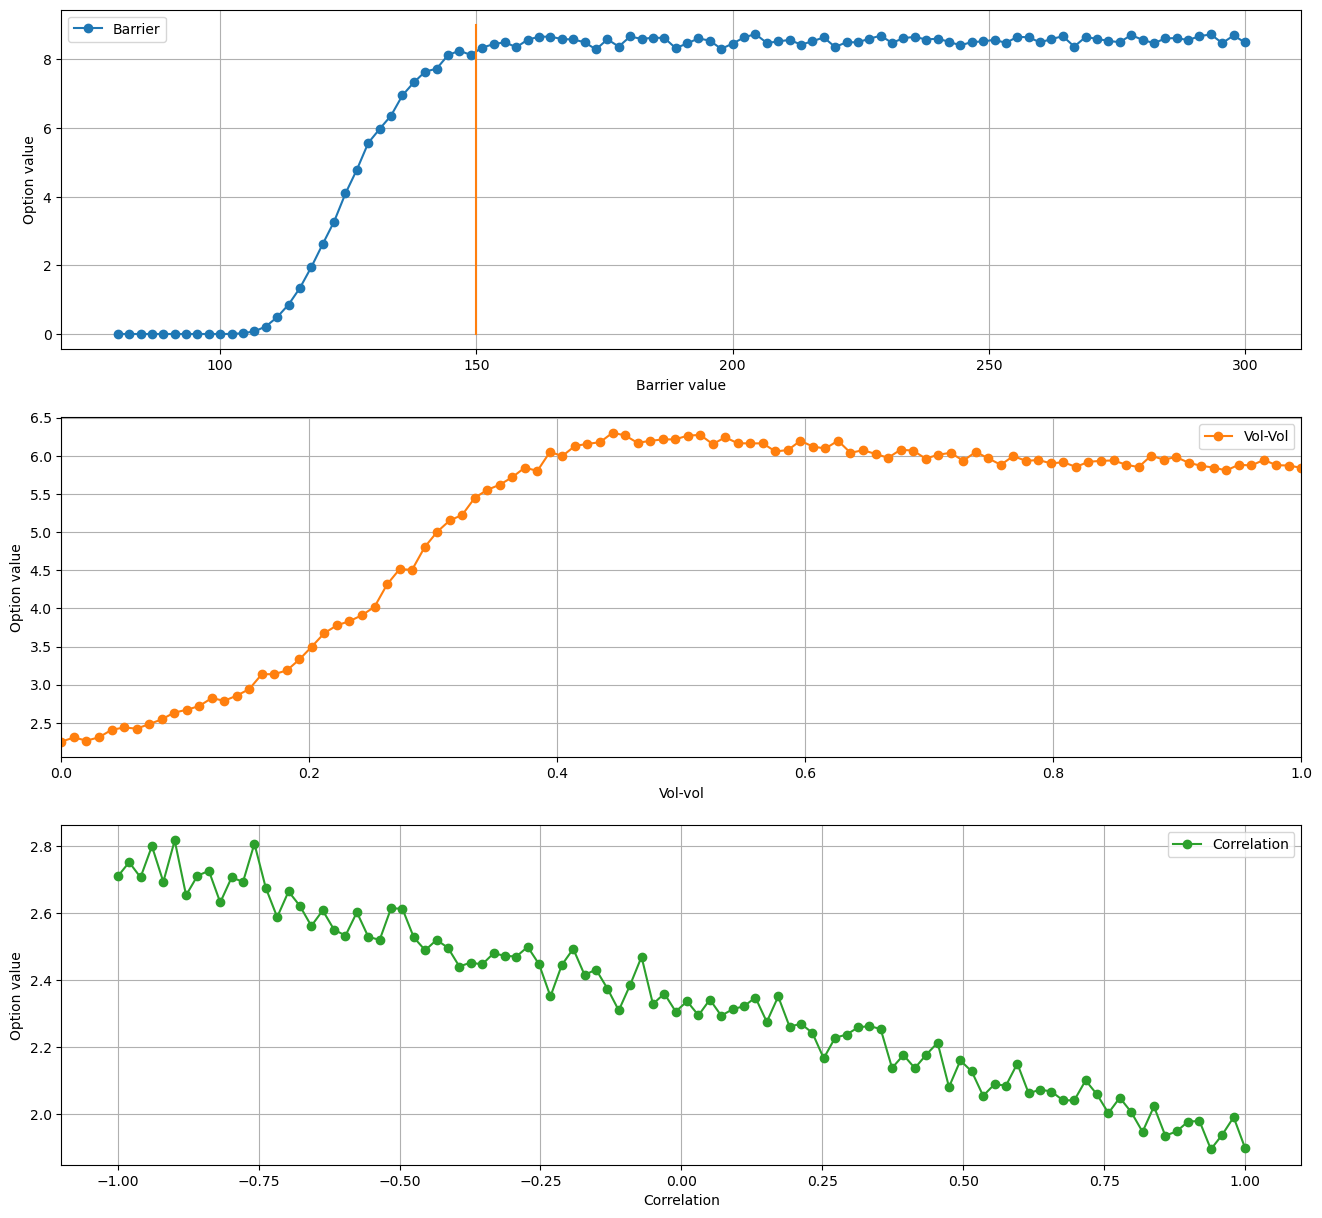

In [143]:
fig,axs = plt.subplots(3,1, figsize = (16,15))
axs[0].plot(Bs,barrier_change, marker = 'o',label = "Barrier")
axs[0].plot((150,150),(0,9))

axs[1].plot(sigmas,vol_change, marker = 'o',label = "Vol-Vol", color = 'C1')
axs[2].plot(ps,corr_change, marker = 'o',label = "Correlation", color = 'C2')
axs[1].set_xlim(0, 1)

axs[0].set_xlabel("Barrier value")
axs[1].set_xlabel("Vol-vol")
axs[2].set_xlabel("Correlation")

axs[0].set_ylabel("Option value")
axs[1].set_ylabel("Option value")
axs[2].set_ylabel("Option value")

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

# Part II: Estimation of sensitiviteis if MC

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Deltas():
    def __init__(self, S,r,vol, T, K ,n_samples):
        """
        Black_scholes model class.
        Inputs:
            -   S: stock price
            -   r: risk-free interest rate
            -   vol: volatility fo the stock % in decimals
            -   T: Time period
            -   K: Strike price
            -   n_samples: For big MC simulations
        """

        self.S = S
        self.r = r
        self.vol = vol
        self.T = T
        self.K = K
        self.n_samples = n_samples

    

    def option_value(self, seed = False, digital_option = False):
        """"
        Computes the option value, mainly for monte carlo used
        Inputs:
            - epsilon_smoothing: If use smoothing
            - seed: If use an specific seed
        """

        if seed != False:
            np.random.seed(seed)
        Z = np.random.normal(0,1,size = self.n_samples)
        self.St = self.S*np.exp((self.r - 0.5*self.vol**2)*self.T + self.vol*np.sqrt(self.T)*Z)

        if digital_option == False:
            self.Hi = np.exp(-self.r*self.T)*np.maximum(self.St-self.K,0)
        else:
            self.Hi =np.exp(-self.r*self.T)* np.where((self.St-self.K )>0,1,0)
   


    def bump_revalue(self, bump, seed = False, digital_option = False):
        """
        Does MonteCarlo method for delta parameter
        Inputs:
            - epsilon_smoothing: If use smoothing
            - Seed: Seed to use
        """
        if seed == True:
            seed = np.random.randint(1, 1000)
        
        self.option_value(seed = seed, digital_option = digital_option)
        pi = (self.Hi)

        self.S += bump
        self.option_value(seed = seed, digital_option = digital_option)

        pi_bump = (self.Hi)
        self.deltas = (pi_bump-pi)/bump
        self.delta = np.average(self.deltas)
        self.rmse = np.std(self.deltas)/np.sqrt(self.n_samples)



    def path_wise(self, digital_option = False, smooth = None):
        """
        Does path wise method
        """
 
        Z = np.random.normal(0,1,size = self.n_samples)
        self.St = self.S*np.exp((self.r - 0.5*self.vol**2)*self.T + self.vol*np.sqrt(self.T)*Z)
        
        if digital_option == False:
            self.deltas = np.exp(-self.r*self.T) * (self.St/self.S) * np.where((self.St - self.K) > 0,1,0)

        elif digital_option == True:
            term = (self.St-self.K)/smooth
            self.deltas = np.exp(-self.r*self.T) * sigmoid(term) * (1-sigmoid(term)) * self.St/(smooth*self.S)
            
        self.delta = np.average(self.deltas)
        self.rmse = np.std(self.deltas)/np.sqrt(self.n_samples)
    
    def likelihood_ratio(self, digital_option = False):
        """
        Does likelihood ratio method
        """
        Z = np.random.normal(0,1,size = self.n_samples)
        self.St = self.S*np.exp((self.r - 0.5*self.vol**2)*self.T + self.vol*np.sqrt(self.T)*Z)
        
        Y = (np.log(self.St/self.S) - (self.r -1/2 *self.vol**2)*self.T)/(self.S*(self.vol**2)*self.T)

        if digital_option == False:
            self.deltas = np.exp(-self.r*self.T) * (Y) * np.maximum(self.St - self.K,0)
          

        elif digital_option == True:
            self.deltas = np.exp(-self.r*self.T) * (Y) * np.where((self.St - self.K) > 0,1,0)
          
        self.delta = np.average(self.deltas)
        self.rmse = np.std(self.deltas)/np.sqrt(self.n_samples)
        
        


In [8]:
def plot_conf(n_samples_list,deltas,rmse,axs,label, black = True):
    S = 100
    K = 99
    T = 1
    r = 0.06
    vol = 0.2
    N = 10
    
    z_95 = 1.96
    z_99 = 2.576
    
    mc_prices = deltas

    upper_95 = deltas + z_95*rmse
    lower_95 = deltas - z_95*rmse
    upper_99 = deltas + z_99*rmse
    lower_99 = deltas - z_99*rmse
        
    bs = Black_scholes(S,r,vol,T,N,K)

    axs.plot(n_samples_list, mc_prices,marker='o', label=f"{label}") 
    axs.plot(n_samples_list, upper_95, marker='o',label=f"Upper 95% CI", linestyle= "dashed", color= "blue")
    axs.plot(n_samples_list,lower_95, marker='o',label=f"Lower 95% CI", linestyle= "dashed", color= "blue")
    axs.plot(n_samples_list,upper_99, marker='o',label=f"Upper 99% CI", linestyle= "dotted", color= "green")
    axs.plot(n_samples_list,lower_99, marker='o',label=f"Lower 99% CI", linestyle= "dotted", color= "green")

    if black == True:
        axs.plot(n_samples_list,np.full(len(n_samples_list), bs.delta), label=f"BS Hedge", linestyle= "dotted", color= "red")
        print(f'Average error: {np.abs(np.average(deltas[10:] - bs.delta))}')
        print(f'Average rmse: {np.abs(np.average(z_95*rmse[10:]))}')
    axs.grid(True)
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Hedge parameter")
    axs.legend()
    
def plot_conv(n_samples_list,deltas,axs,label):
    S = 100
    K = 99
    T = 1
    r = 0.06
    vol = 0.2
    N = 10
        
    bs = Black_scholes(S,r,vol,T,N,K)
    axs.plot(n_samples_list, np.abs(deltas - bs.delta),marker='o', label=f"{label}")
    axs.grid(True) 
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Abs Error with Black Scholes")
    axs.set_ylim(0)
    axs.legend()

### 1.Different seeds and Same seeds

In [23]:
S = 100
K = 99
T = 1
r = 0.06
vol = 0.2
bump = 1
n_samples_list = np.linspace(1000,10**7, num = 50, dtype =int)


In [26]:
black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump))(black_scholes)
deltas_d = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_d = np.vectorize(lambda x: x.rmse)(black_scholes)


black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump, seed = True))(black_scholes)
deltas_s = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_s = np.vectorize(lambda x: x.rmse)(black_scholes)
del black_scholes


Average error: 0.007908017025867286
Average rmse: 0.01852841093840224
Average error: 0.00885474041633449
Average rmse: 0.00047167453669130224


c:\Users\joann\OneDrive\Escritorio\Intro\Computational-Finance-Assigment\black_scholes.py:174: RuntimeWarning: divide by zero encountered in divide
  d1s = (np.log(St/self.K) + (self.r + 0.5*(vol_hedge**2)*self.taos))/(self.vol*np.sqrt(self.taos))
c:\Users\joann\OneDrive\Escritorio\Intro\Computational-Finance-Assigment\black_scholes.py:98: RuntimeWarning: divide by zero encountered in divide
  d1s = (np.log(self.eu_St/self.K) + (self.r + 0.5*(vol_hedge**2)*self.taos))/(vol_hedge*np.sqrt(self.taos))


(0.0, 0.030917670946238412)

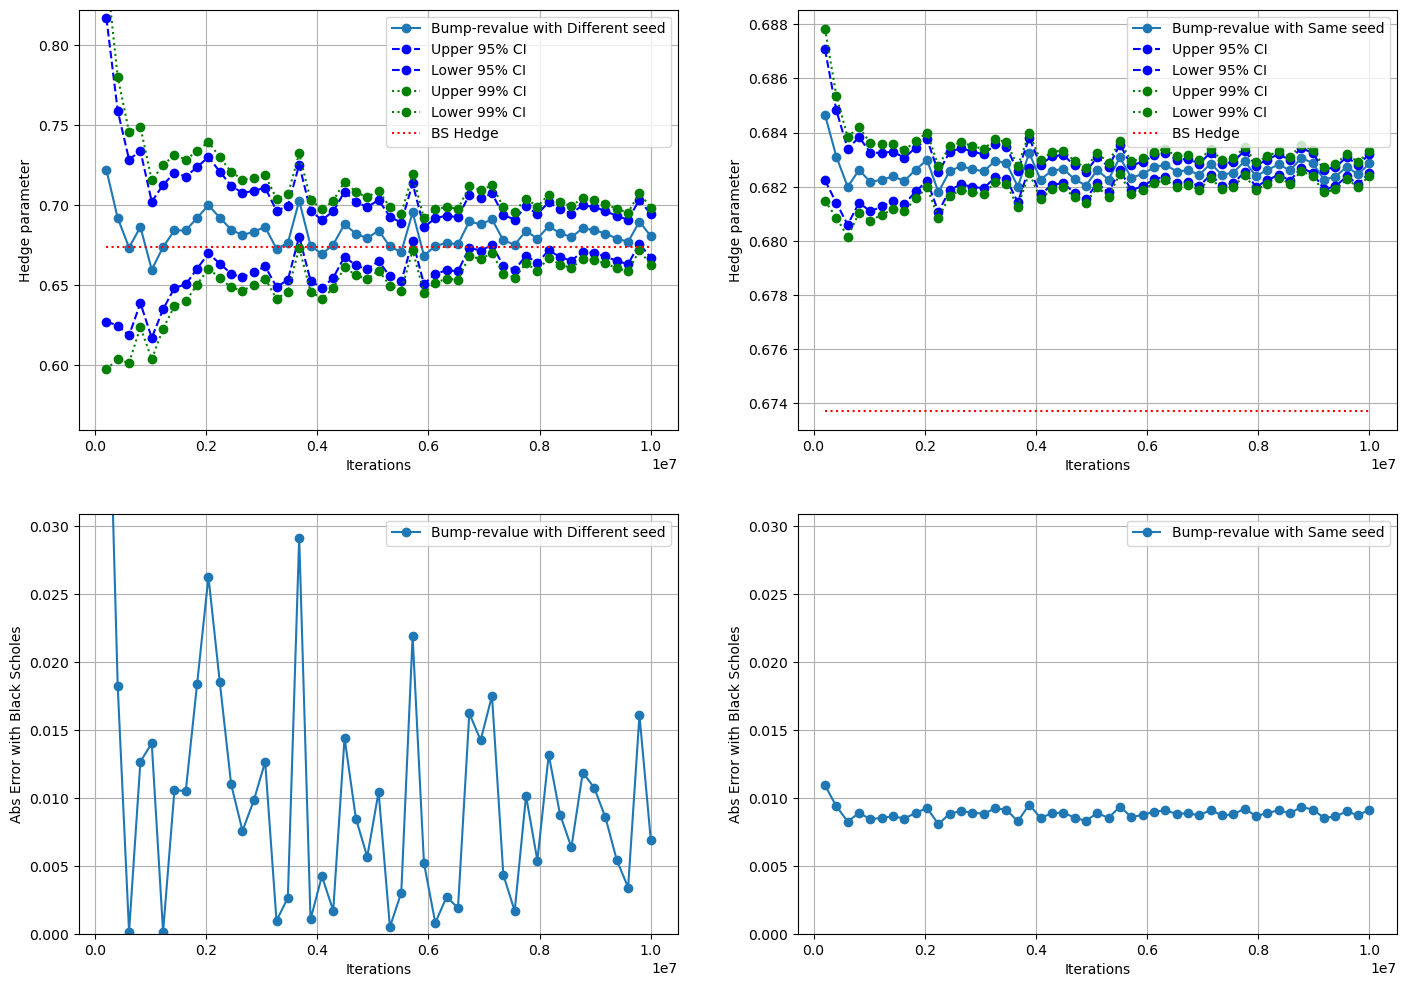

In [30]:
fig, axs = plt.subplots(2,2, figsize = (17,12))
axs = axs.flatten()
#axs.set_ylim(min(min(deltas_d), min(deltas_s)), max(max(deltas_d), max(deltas_s)))
S = 100
K = 99
T = 1
r = 0.06
vol = 0.2
N = 10
bs = Black_scholes(S,r,vol,T,N,K)
plot_conf(n_samples_list[1:],deltas_d[1:],rmse_d[1:], axs[0],label = "Bump-revalue with Different seed")
plot_conf(n_samples_list[1:],deltas_s[1:],rmse_s[1:], axs[1],label = "Bump-revalue with Same seed")
plot_conv(n_samples_list[1:],deltas_d[1:], axs[2],label = "Bump-revalue with Different seed")
plot_conv(n_samples_list[1:],deltas_s[1:], axs[3],label = "Bump-revalue with Same seed")
axs[0].set_ylim(min(deltas_d[1:])-0.1,max(deltas_d[1:] )+0.1)
#axs[1].set_ylim(min(deltas_d[1:])-0.1,max(deltas_d[1:] )+0.1)

axs[2].set_ylim(0,max(deltas_s[1:] - bs.delta)+0.02)
axs[3].set_ylim(0,max(deltas_s[1:] - bs.delta)+0.02)



### 2. Digital option

In [545]:
S = 100
K = 99
T = 1
r = 0.06
vol = 0.2
n_samples_list = np.linspace(10,10**7, num = 50, dtype =int)

In [562]:
black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump, digital_option = False))(black_scholes)
deltas_d = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_d = np.vectorize(lambda x: x.rmse)(black_scholes)


black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump, seed = True,  digital_option = False))(black_scholes)
deltas_s = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_s = np.vectorize(lambda x: x.rmse)(black_scholes)

del black_scholes

In [563]:
black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump, digital_option = True))(black_scholes)
deltas_d = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_d = np.vectorize(lambda x: x.rmse)(black_scholes)


black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.bump_revalue(bump, seed = True,  digital_option = True))(black_scholes)
deltas_s = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_s = np.vectorize(lambda x: x.rmse)(black_scholes)

del black_scholes

In [564]:
black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.path_wise(digital_option = True, smooth = 0.05))(black_scholes)
deltas_p = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_p = np.vectorize(lambda x: x.rmse)(black_scholes)
print(z_95*rmse_p[-1])
del black_scholes

C:\Users\joann\AppData\Local\Temp\ipykernel_9536\2635852494.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.000147012141335595


In [565]:
black_scholes = np.vectorize(Deltas, excluded= ['S','r','vol','T','K'])(S,r,vol,T,K,n_samples_list)
np.vectorize(lambda x: x.likelihood_ratio(digital_option = True))(black_scholes)
deltas_l = np.vectorize(lambda x: x.delta)(black_scholes)
rmse_l = np.vectorize(lambda x: x.rmse)(black_scholes)

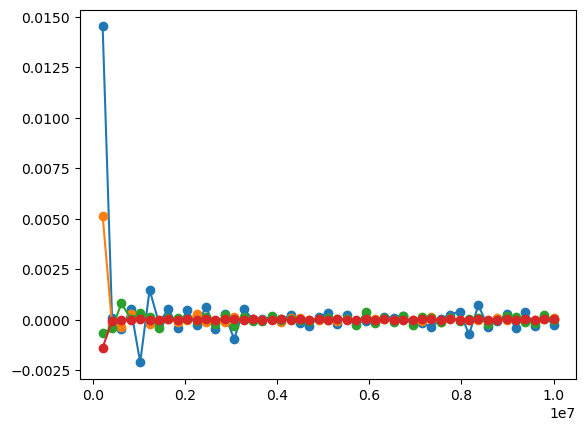

In [560]:
d1 = np.diff(deltas_d)
d2 = np.diff(deltas_s)
d3 = np.diff(deltas_p)
d4 = np.diff(deltas_l)

plt.plot(n_samples_list[1:], d1, marker='o', label="95% CI, Bump-revalue with Different seed")
plt.plot(n_samples_list[1:], d2,  marker='o', label="95% CI, Bump-revalue with same seed")
plt.plot(n_samples_list[1:], d3, marker='o', label="95% CI, Path wise")
plt.plot(n_samples_list[1:], d4,  marker='o', label="95% CI, Likelihood ratio")

Different seed
0.01779143886266019
0.00040286566909519426
Same seed
0.018023395467282
7.997412918875383e-05
Path wise
0.018217603373813538
0.000147012141335595
Log likelihood
0.018213370452117267
1.7329340962138416e-05


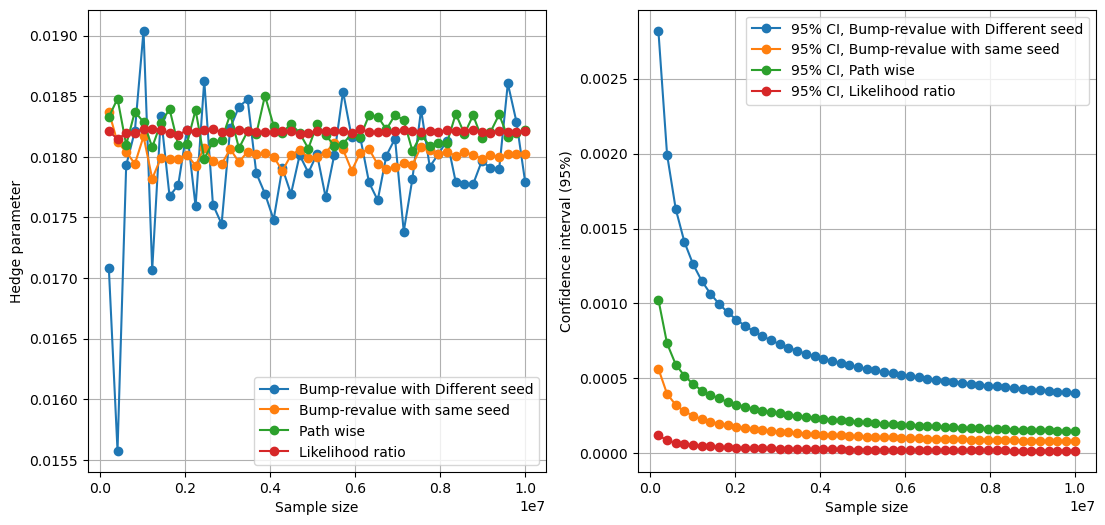

In [570]:
fig, axs = plt.subplots(1,2, figsize = (13,6))
axs = axs.flatten()
z_95 = 1.96
err1 = z_95*rmse_d
err2 = z_95*rmse_s
err3 = z_95*rmse_p
err4 = z_95*rmse_l

axs[0].plot(n_samples_list[1:], deltas_d[1:],  marker='o', label="Bump-revalue with Different seed")
axs[0].plot(n_samples_list[1:], deltas_s[1:], marker='o', label="Bump-revalue with same seed")
axs[0].plot(n_samples_list[1:], deltas_p[1:],  marker='o',  label="Path wise")
axs[0].plot(n_samples_list[1:], deltas_l[1:], marker='o', label="Likelihood ratio")


axs[1].plot(n_samples_list[1:], err1[1:], marker='o', label="95% CI, Bump-revalue with Different seed")
axs[1].plot(n_samples_list[1:], err2[1:],  marker='o', label="95% CI, Bump-revalue with same seed")
axs[1].plot(n_samples_list[1:], err3[1:], marker='o', label="95% CI, Path wise")
axs[1].plot(n_samples_list[1:], err4[1:],  marker='o', label="95% CI, Likelihood ratio")
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlabel('Sample size')
axs[1].set_xlabel('Sample size')
axs[0].set_ylabel('Hedge parameter')
axs[1].set_ylabel('Confidence interval (95%)')


axs[0].legend()
axs[1].legend()

print('Different seed')
print(deltas_d[-1])
print(err1[-1])
print('Same seed')
print(deltas_s[-1])
print(err2[-1])

print('Path wise')
print(deltas_p[-1])
print(err3[-1])

print('Log likelihood')
print(deltas_l[-1])
print(err4[-1])